My KNN class

In [114]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
    
    # train    
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        
    def euclidianDistance(self, a, b):
        d = np.sqrt(np.sum((a - b) ** 2))
        return d
    
    def nearNeighbors(self, X_test):
        dists = []
        for x_train in self.X_train:
            dist = self.euclidianDistance(x_train, X_test)
            dists.append(dist)
            
        index_sorted = np.argsort(dists)
        gender_sorted = self.Y_train[index_sorted]
        
        return gender_sorted[0 : self.k]
        
    # test    
    def predict(self, X_test):
        nearestNeighbors = self.nearNeighbors(X_test)
        Y_test = np.argmax(np.bincount(nearestNeighbors))
        
        return Y_test
    
    # evaluate
    def evaluate(self, X_test, Y_test):
        pred = []
        for x in X_test:
            pred.append(self.predict(x))
            
        correct = 0
        for i in range(len(X_test)):
            if pred[i] == Y_test[i]:
                correct = correct + 1
        
        answer = correct/len(Y_test)
        
        return answer 

My Perceptron class

In [115]:
class Perceptron:
    def __init__(self, lr_w=0.00001, lr_b=0.01, epochs=3):
        self.w = np.random.rand(5, 1)
        self.b = np.random.rand(1, 1)
        self.lr_w = lr_w
        self.lr_b = lr_b
        self.epochs = epochs
        
    def fit(self, X_train, Y_train):        
        for epoch in range(self.epochs):
            for i in range(X_train.shape[0]):    
                x = X_train[i]
                y = Y_train[i]
                
                y_pred = np.matmul(x, self.w) + self.b
                e = y - y_pred
                
                self.w += (self.lr_w * e * X_train[i, :].T).T
                self.b += self.lr_b * e

    def predict(self, x):
        y_pred_answer = np.matmul(x, self.w) + self.b
        return y_pred_answer

    def evaluate(self, X, Y):
        Y_pred = np.matmul(X, self.w) + self.b
        Y_pred = np.where(Y_pred < 0.5, 0, 1)
        return accuracy_score(Y, Y_pred)
    

Libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Dense

Load train data

In [117]:
data_train = pd.read_csv('data/train.csv')
data_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Prepare train data

In [118]:
data_train = data_train.replace(["female", "male"], [0, 1])
data_train = data_train.replace(["S", "C", "Q"], [0, 1, 2])
data_train = data_train.fillna(30)

X_train = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch"]])
Y_train = np.array(data_train[["Survived"]])

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

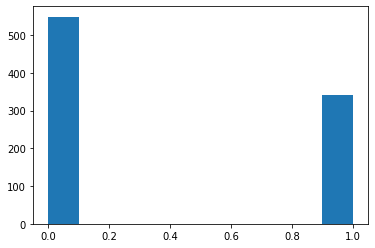

In [119]:
plt.hist(data_train['Survived'])

Load test data

In [120]:
data_test = pd.read_csv("data/test.csv")
data_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [121]:
data_gender_submission = pd.read_csv("data/gender_submission.csv")
data_gender_submission.head(1)

,PassengerId,Survived
0,892,0


Prepare test data

In [122]:
data_gender_submission = pd.read_csv("data/gender_submission.csv")
data_test = pd.read_csv("data/test.csv")

data_test = data_test.replace(["female", "male"], [0, 1])
data_test = data_test.replace(["S", "C", "Q"], [0, 1, 2])
data_test = data_test.fillna(30)

X_test = np.array(data_test[["Pclass", "Sex", "Age", "SibSp", "Parch"]])
Y_test = np.array(data_gender_submission[["Survived"]]) 

print(X_test.shape, Y_test.shape)

(418, 5) (418, 1)


# KNN

Create and Fit

In [123]:
knn = KNeighborsClassifier(n_neighbors=5) # توابع کلاس آماده sklearn
knn.fit(X_train, Y_train)

C:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Predict

(array([262.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 156.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

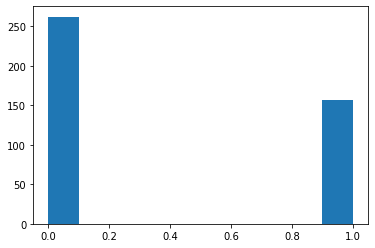

In [124]:
Y_pred = knn.predict(X_test)
plt.hist(Y_pred)

Accuracy score for KNN

In [125]:
accuracy_KNN = accuracy_score(Y_test, Y_pred)
accuracy_KNN

0.7894736842105263

# Perceptron

Create and Fit

In [126]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

Predict and Evaluate for Perceptron

In [127]:
Y_pred = perceptron.predict(X_test)
accuracy_Perceptron = perceptron.evaluate(X_test, Y_test)
accuracy_Perceptron

0.6028708133971292

# MLP

Model

In [158]:
model = tf.keras.models.Sequential([
    Dense(5, activation='sigmoid'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

In [159]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

Train

In [160]:
train_output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.5701
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.6162
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.6162
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.6162
Epoch 5/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6162
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6162
Epoch 7/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.6162
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6162
Epoch 9/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.6162
Epoch 10/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.6162
Epoch 11/

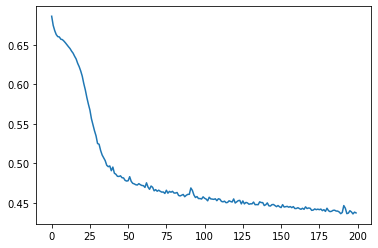

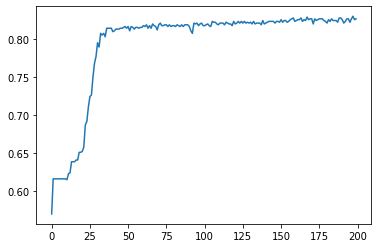

In [161]:
plt.plot(train_output.history["loss"])
plt.show()
plt.plot(train_output.history["accuracy"])
plt.show()

Predict

In [162]:
jack = np.array([[1, 1, 36, 0, 0]])

result = model.predict(jack)
print(result)
print(np.argmax(result))

[[0.76491725 0.23508276]]
0


Evaluate for MLP

In [163]:
model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.2850 - accuracy: 0.9665


[0.2849607467651367, 0.9665071964263916]

Save model

In [164]:
model.save("My_Titanic.h5")

Load model

In [165]:
model = tf.keras.models.load_model("My_Titanic.h5")